# Import libraries

In [1]:
# Ref: http://puremonkey2010.blogspot.com/2017/06/toolkit-keras-mnist.html
#      http://yhhuang1966.blogspot.com/2018/03/keras-mlp.html
#      https://dotblogs.com.tw/greengem/2017/12/17/094023
#      https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-2%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E6%84%9F%E7%9F%A5%E5%99%A8-perceptron-%E4%BB%8B%E7%B4%B9-84d8b809f866

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from IPython.display import SVG

# Progress bar
# 100%|██████████| 7178/7178 [00:04<00:00, 1534.93it/s]
import tqdm

# Libraries for deep learning
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils, plot_model
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils  # convert label to one-hot-encoding
from keras.callbacks import ModelCheckpoint

# Set random seed
np.random.seed(10)

# For OpenVINO
import tensorflow as tf

Using TensorFlow backend.


# Download & Load mnist dataset

In [2]:
# Load mnist keras built-in dataset
from keras.datasets import mnist
(x_train_img, y_train_label), (x_test_img, y_test_label) = mnist.load_data()

# Preview data shape
print("Train data: {:,} images".format(len(x_train_img)))
print("Test data: {:,} images".format(len(x_test_img)))

# Reshape (add color channel)
x_train_img = x_train_img.reshape(-1, 28, 28, 1)
x_test_img = x_test_img.reshape(-1, 28, 28, 1)

# Check type and shape
print('\ntrain data type and shape')
print(type(x_train_img), x_train_img.shape, type(y_train_label), y_train_label.shape)
print('test data and shape')
print(type(x_test_img), x_test_img.shape, type(y_test_label), y_test_label.shape)

Train data: 60,000 images
Test data: 10,000 images

train data type and shape
<class 'numpy.ndarray'> (60000, 28, 28, 1) <class 'numpy.ndarray'> (60000,)
test data and shape
<class 'numpy.ndarray'> (10000, 28, 28, 1) <class 'numpy.ndarray'> (10000,)


# <font face="Microsoft JhengHei">View Data</font>

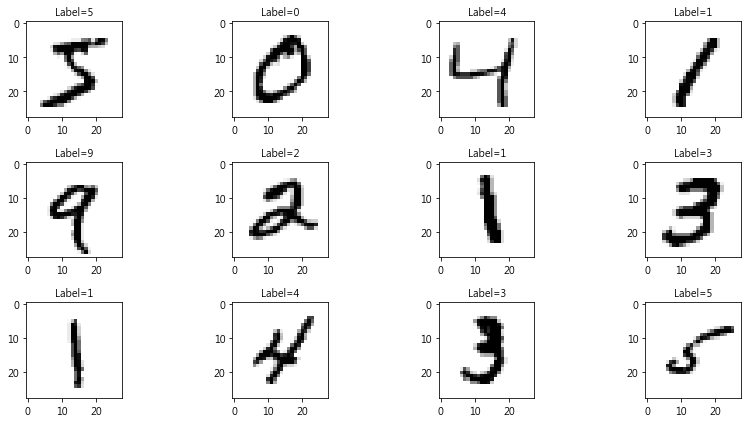


Image index 0 array:
Label = 5


In [3]:
plt.figure(0, figsize=(12,6))
for i in range(0, 12):
    ax = plt.subplot(3, 4, i+1)
    title = "Label={}".format(str(y_train_label[i]))
    ax.set_title(title, fontsize=10)
    plt.imshow(x_train_img[i].reshape(28, 28), cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示(0白,255黑)、cmap='gray' 為0黑,255白

plt.tight_layout()
plt.show()

print("\nImage index 0 array:")
print("Label = {}".format(y_train_label[0]))

# <font face="Microsoft JhengHei">Normalization & One-hot</font>

In [4]:
# Normalization
# Why we need normalization?
# https://zh.wikipedia.org/wiki/%E7%89%B9%E5%BE%B5%E7%B8%AE%E6%94%BE
# http://goudanlee.com/2017/06/22/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E4%B8%AD%E7%9A%84%E7%89%B9%E5%BE%81%E7%BC%A9%E6%94%BE%EF%BC%88feature-scaling%EF%BC%89/

x_train = x_train_img.astype('float32') / 255
x_test = x_test_img.astype('float32') / 255
print("x_train: {}".format(str(x_train.shape)))
print("x_test: {}".format(str(x_test.shape)))

# One-hot
# What is it?
# https://yq.aliyun.com/articles/126741
y_train = np_utils.to_categorical(y_train_label, num_classes=10) # num_classes為 One-hot 分類總類別數，未指定則自動由來源資料判定
y_test = np_utils.to_categorical(y_test_label, num_classes=10)
print("\ny_train: {}".format(str(y_train.shape)))
print("y_test: {}".format(str(y_test.shape)))

print("\nImage index 0 array:")
print("Label = {}".format(y_train[0]))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)

Image index 0 array:
Label = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# <font face="Microsoft JhengHei">Create model</font>

In [ ]:
model = Sequential()  # Build Linear Model

# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25)) 

# Add Flatten layer
model.add(Flatten())

# Add Hidden layer
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))

# Add Output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model summary:")
model.summary()

Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832

# <font face="Microsoft JhengHei">Plot Model Graph</font>

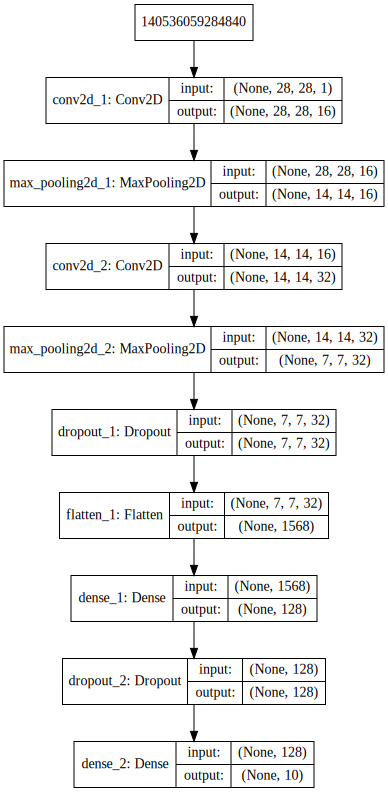

In [ ]:
show_shapes = True
#plot_model(model, show_shapes=show_shapes, to_file='{}'.format('model.png'))
SVG(model_to_dot(model, show_shapes=show_shapes).create(prog="dot", format="svg"))

# <font face="Microsoft JhengHei">FIT!</font>

In [ ]:
# Save best weights
checkpointer = ModelCheckpoint(filepath='best_model.h5', verbose=1, save_best_only=True)

# TQDMNotebookCallback for notebook
# TQDMCallback for text mode
train_history = model.fit(x=x_train, y=y_train, 
                          validation_split=0.1, epochs=10, batch_size=200, verbose=1, 
                          callbacks=[checkpointer])

# evaluate model
model.evaluate(x_test, y_test, verbose=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.4043 - acc: 0.8742 - val_loss: 0.0689 - val_acc: 0.9803

Epoch 00001: val_loss improved from inf to 0.06894, saving model to best_model.h5
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.1209 - acc: 0.9638 - val_loss: 0.0475 - val_acc: 0.9863

Epoch 00002: val_loss improved from 0.06894 to 0.04755, saving model to best_model.h5
Epoch 3/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.0844 - acc: 0.9745 - val_loss: 0.0380 - val_acc: 0.9893

Epoch 00003: val_loss improved from 0.04755 to 0.03800, saving model to best_model.h5
Epoch 4/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.0678 - acc: 0.9783 - val_loss: 0.0339 - val_acc: 0.9903

Epoch 00004: val_loss improved from 0.03800 to 0.03390, saving model to best_model.h5
Epoch 5/10
54000/54000 [==============================] - 1

[0.020947205006019702, 0.9924]

# <font face="Microsoft JhengHei">Plot Logs</font>

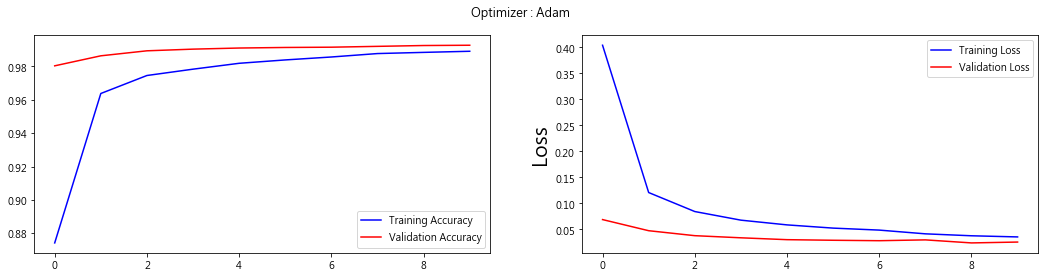

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=12)
plt.plot(train_history.history['acc'], color='b', label='Training Accuracy')
plt.plot(train_history.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.plot(train_history.history['loss'], color='b', label='Training Loss')
plt.plot(train_history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

# <font face="Microsoft JhengHei">Save Freeze model

In [ ]:
from keras import backend as K
from tensorflow.python.framework import graph_io

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
                
        #print('{}:{}\n{}:{}\n{}:{}'.format(len(freeze_var_names), freeze_var_names, 
        #                                   len(freeze_var_names), output_names, 
        #                                   len(freeze_var_names), freeze_var_names))
        
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph
    
frozen = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

# import graph_def
with tf.Graph().as_default() as graph:
    tf.import_graph_def(frozen)
    
#for op in graph.get_operations():
#    print(op.name)

pb_path = graph_io.write_graph(frozen, './pb_model', 'inference_graph.pb', as_text=False)
pb_path

INFO:tensorflow:Froze 37 variables.
INFO:tensorflow:Converted 37 variables to const ops.


'./pb_model/inference_graph.pb'

# Convert pb model to IR model using BASH

In [ ]:
%%bash -s "$pb_path"
export var1=$1
export var2="./vino_model"
. /opt/intel/openvino/bin/setupvars.sh
mo.py --input_model $var1 --output_dir $var2 --input_shape [1,28,28,1] --data_type=FP16